In [10]:
#Calculating continuum Action in two Dimensional De Sitter Spacetime

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
import operator
A=1
a4=[]
y1=[]

q=range(300,2200,200) #number of elements

for j in range(1,A+1):
    a2=[]
    t1=-5
    y=[]
    
    for N in q:
        
        #Tim(k) solves the time required to maintain the uniform density of rho=2000000 as we increase more points 
        def Tim(k):
            H=100
            rho=2000000
            a=1
            c=25
            b=10*(math.exp((k*H**2)/(2*rho))-1)
            d=b**2-4*a*c
            R= (-b+math.sqrt(d))/(2*a)
            return R
    
        
        T=Tim(N)
        y.append(T)
        
    y1.append(y)
    

k=y1[0]
r=[]

#Calculate the Action using S=2*H^2*V, where V= 2/H^2 * ln((t1+T)^2/4*t1*T) for each number of points
for i in range(len(k)):  
    l=4*math.log((k[i]-5)**2/(-20*k[i]))  
    r.append(l)
print(r)

[0.22741127776021813, 2.227411277760219, 4.227411277760212, 6.2274112777602175, 8.22741127776031, 10.22741127776031, 12.227411277761567, 14.227411277760076, 16.22741127775863, 18.227411277769455]


25


<IPython.core.display.Javascript object>


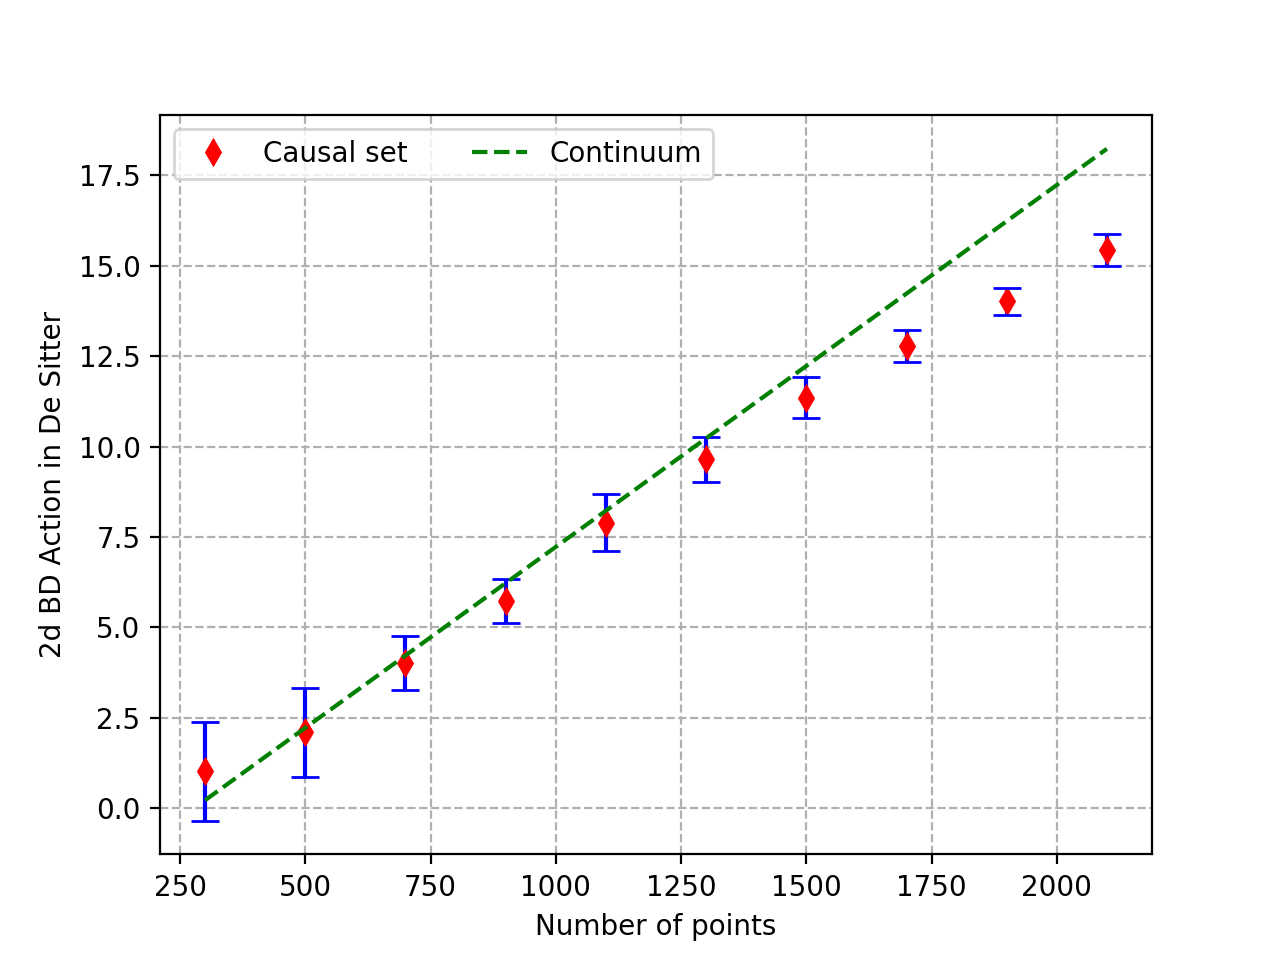

In [24]:
#Two Dimensional calculation of Chain Action in De Sitter Spacetime (Causal Sets)

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math

A=int(input()) #Number of times the code can be iterated 
a4=[]
q=range(300,2200,200) #Range of number of elements

for j in range(1,A+1):
    a2=[]
    t1=-5
     
    for N in q:
        
    #Time(k) solves the time required to maintain the uniform density of rho=2000000 as we increase more points 
        def Time(k):
            H=100
            rho=2000000
            a=1
            c=25
            b=10*(math.exp((k*H**2)/(2*rho))-1)
            d=b**2-4*a*c
            R= (-b+math.sqrt(d))/(2*a)
            return R
        
        T=Time(N)
        x2=(t1-T)/2
        x1=-x2
        L=[]
        count=0
        
        #Obatin points that lie inside the Alexendrov interval(Diamond shape) for each number of points(N)
        while count<N:
            R1 = np.random.uniform(0,1)
            R2 = np.random.uniform(0,1)
            lx=R1*(x2-x1)+x1
            lt=(T*t1)/(R2*(t1-T)+T)
            if (np.square((lt)-(t1))>np.square(lx)and np.square((lt)-(T))>np.square(lx)):
                count+=1
                tuple=[lx,lt]
                L.append(tuple)
        
        x=[0,T]
        y=[0,t1]

        L.append(x)
        L.append(y)
        
        
        #The L list is ordered according to increasing time
        def takeSecond(elem):
            return elem[1]    
        L.sort(key=takeSecond) 
        
        #Obtain Relations matrix (R)
        R=[]
        for j in range(len(L)):
            R.append([])
            for i in range(len(L)):
                if (np.square(L[i][1]-L[j][1])>= np.square(L[i][0]-L[j][0]) and L[i][1]> L[j][1]):
                    R[j].append(1) 
                else:
                    R[j].append(0)
        I=np.identity(len(R))
        R1=np.dot(I,R)          
        R2=np.dot(R,R)
        R3=np.dot(R,R2)
        
        #Calculate number of chain length-3
        c3=R3[0][len(R2)-1] 
 
        #Calculate Action using C3
        Act=36*((4*c3/(N*(N-1))-1))
        a2.append(Act)
    a4.append(a2)


#Calculating standard deviation (G) for each value of Action(Act) of corresponding (N) 
G=[]
j0=[]
for i in range(len(a4)):  
        j0.append(a4[i][0])
g0=np.std(j0,axis=0)
G.append(g0)
j1=[]
for i in range(len(a4)):  
        j1.append(a4[i][1])
g1=np.std(j1,axis=0)
G.append(g1)
j2=[]
for i in range(len(a4)):  
        j2.append(a4[i][2])
g2=np.std(j2,axis=0)
G.append(g2)

j3=[]
for i in range(len(a4)):  
        j3.append(a4[i][3])
g3=np.std(j3,axis=0)
G.append(g3)
j4=[]
for i in range(len(a4)):  
        j4.append(a4[i][4])
g4=np.std(j4,axis=0)
G.append(g4)
j5=[]
for i in range(len(a4)):  
        j5.append(a4[i][5])
g5=np.std(j5,axis=0)
G.append(g5)
j6=[]
for i in range(len(a4)):  
        j6.append(a4[i][6])
g6=np.std(j6,axis=0)
G.append(g6)
j7=[]
for i in range(len(a4)):  
        j7.append(a4[i][7])
g7=np.std(j7,axis=0)
G.append(g7)
j8=[]
for i in range(len(a4)):  
        j8.append(a4[i][8])
g8=np.std(j8,axis=0)
G.append(g8)

j9=[]
for i in range(len(a4)):  
        j9.append(a4[i][9])
g9=np.std(j9,axis=0)
G.append(g9)

#Plot the action by averaging value over 25 different causal sets along with error bars
k=np.sum(a4,0)/A
plt.plot(q,k,'o',color='red',marker='d')
plt.errorbar(q, k, yerr=G, fmt='o', markersize=0, capsize=5, ecolor='blue');  

#Plot continuum action
a=[q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9]]
b=[r[0],r[1],r[2],r[3],r[4], r[5],r[6],r[7],r[8],r[9]]
plt.plot(a, b, color='green', linestyle="--")

plt.legend(["Causal set ","Continuum"], ncol = 2 , loc = "upper left")
plt.xlabel('Number of points')
plt.ylabel('2d Chain Action in De Sitter')
plt.grid(True, linestyle='--')
plt.savefig('2d Action DS.pdf')

